# Understanding Descriptive Statistics

Import the necessary libraries here:

In [37]:
# Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
# your code here
def simulate_dice_rolls():
    dice_rolls = random.choices(range(1, 6), k=10)
    dice = pd.DataFrame({'Roll': dice_rolls})
    return dice

df_dice = simulate_dice_rolls()
df_dice

,Roll
0,2
1,1
2,3
3,1
4,2
5,1
6,3
7,3
8,5
9,3


#### 2.- Plot the results sorted by value.

In [32]:
df_dice_values = pd.DataFrame(df_dice.sort_values(by='Roll').value_counts()).reset_index()
df_dice_values

,Roll,count
0,3,4
1,1,3
2,2,2
3,5,1


In [36]:
# your code here
df_dice_sorted = df_dice_values.sort_values(by='Roll')
df_dice_sorted

,Roll,count
1,1,3
2,2,2
0,3,4
3,5,1


<Axes: xlabel='Roll', ylabel='count'>

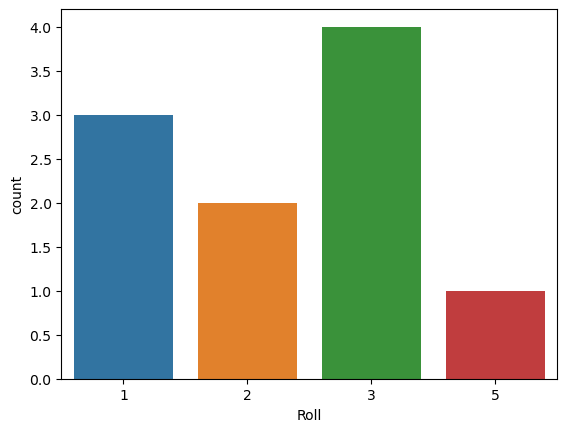

In [43]:
sns.barplot(x='Roll', y='count', data=df_dice_sorted)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [46]:
# Es el mismo que antes. No he debido de entender lo que se quería plotear en el anterior

Roll
1    3
2    2
3    4
5    1
Name: count, dtype: int64

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [124]:
# your code here
def mean(x):
    return sum(x)/sum(x.value_counts())

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [126]:
mean(df_dice['Roll'])

2.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [66]:
valores = list(df_dice['Roll'].sort_values())
valores

[1, 1, 1, 2, 2, 3, 3, 3, 3, 5]

In [79]:
# your code here
valores = list(df_dice['Roll'].sort_values())
def calcular_mediana(valores):
    n = len(valores)
    if n % 2 == 0:
        mediana = (valores[n // 2 - 1] + valores[n // 2]) / 2
    else:
        mediana = valores[n // 2]
    return mediana

In [80]:
n = len(valores)
n

10

In [81]:
calcular_mediana(valores)

2.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [85]:
# your code here
def calcular_cuartiles(valores):
    n = len(valores)
    
    # Calcula los cuartiles
    q1 = valores[int(n * 0.25)]
    q2 = valores[int(n * 0.5)]
    q3 = valores[int(n * 0.75)]
    
    return q1, q2, q3

In [86]:
calcular_cuartiles(valores)

(1, 3, 3)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [91]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


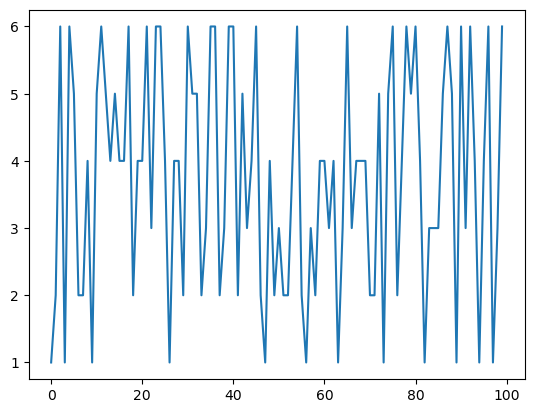

In [109]:
plt.plot(dice['roll'],dice['value'])

In [ ]:
"""
Si esto es lo que se busca, es totalmente aleatorio
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [129]:
# your code here
mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [141]:
# your code here
df_dice_values = pd.DataFrame(dice['value'].value_counts()).reset_index().sort_values(by='value').reset_index(drop=True)
df_dice_values

,value,count
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<Axes: xlabel='value', ylabel='Count'>

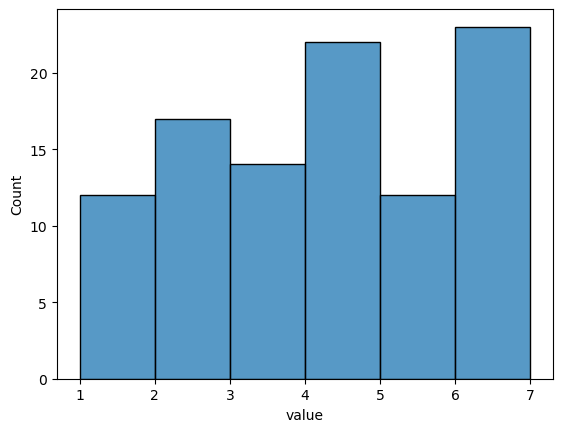

In [149]:
# your code here
sns.histplot(dice['value'], bins=range(1, 8))

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [150]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


<Axes: xlabel='value', ylabel='Count'>

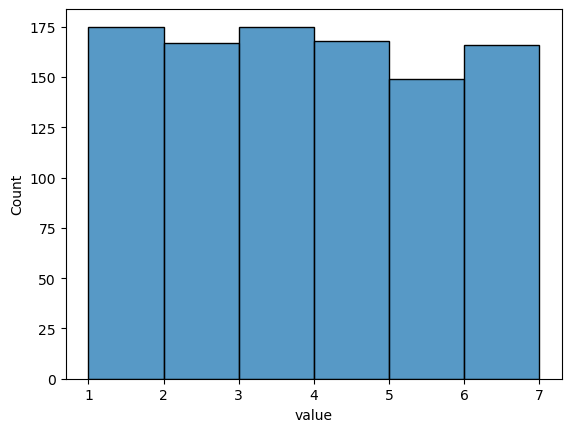

In [151]:
sns.histplot(dice['value'], bins=range(1, 8))

In [152]:
"""
Cada vez se va juntando más y se van haciendo más "aleatorios". Tiende a que todos salgan el mismo número de veces
"""

'\nCada vez se va juntando más y se van haciendo más "aleatorios". Tiende a que todos salgan el mismo número de veces\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [153]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [154]:
age_dist = pd.DataFrame(ages.sort_values(by='observation').value_counts()).reset_index()
age_dist

,observation,count
0,39.0,45
1,41.0,36
2,30.0,34
3,35.0,33
4,43.0,32
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


<Axes: xlabel='observation', ylabel='Count'>

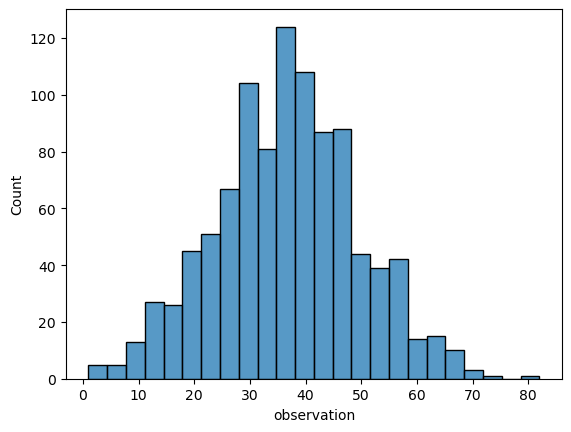

In [155]:
sns.histplot(ages['observation'])

In [ ]:
# Media de 34 y desviacion estandar de 5

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [156]:
# your code here
ages['observation'].mean()

36.56

In [157]:
ages['observation'].std()

12.816499625976762

In [ ]:
"""
La media sí, la std no
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [158]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [159]:
age_dist2 = pd.DataFrame(ages2.sort_values(by='observation').value_counts()).reset_index()
age_dist2

,observation,count
0,28.0,139
1,27.0,125
2,26.0,120
3,29.0,115
4,25.0,98
5,30.0,90
6,24.0,78
7,31.0,61
8,23.0,41
9,22.0,35


<Axes: xlabel='observation', ylabel='Count'>

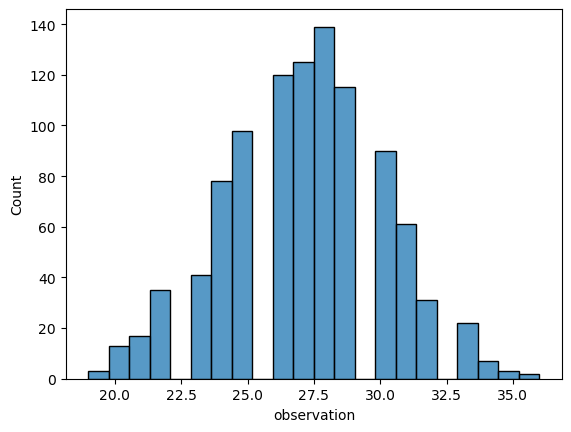

In [160]:
sns.histplot(ages2['observation'])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Menos edades pero mayores frecuencias
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [161]:
# your code here
ages2['observation'].mean()

27.155

In [167]:
ages2['observation'].std()

2.969813932689186

In [168]:
"""
La media ha bajado y al haberse comprimido todo mucho más en cuanto al registro de edades, la std es muy bajita
"""

'\nLa media ha bajado y al haberse comprimido todo mucho más en cuanto al registro de edades, la std es muy bajita\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [163]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [169]:
age_dist3 = pd.DataFrame(ages3.sort_values(by='observation').value_counts()).reset_index()
age_dist3

,observation,count
0,32.0,37
1,37.0,31
2,35.0,31
3,39.0,29
4,36.0,26
...,...,...
70,8.0,1
71,7.0,1
72,5.0,1
73,76.0,1


<Axes: xlabel='observation', ylabel='Count'>

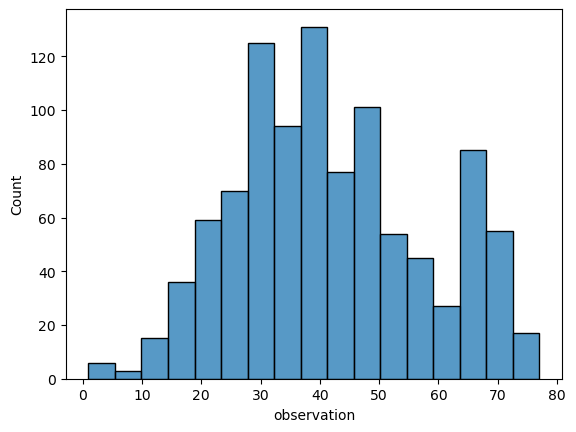

In [170]:
sns.histplot(ages3['observation'])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [164]:
# your code here
ages3['observation'].mean()

41.989

In [166]:
ages3['observation'].std()

16.144705959865934

In [ ]:
"""
Similar al ages 1, pero mayor media
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [171]:
# your code here
ages3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
"""
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

<Axes: ylabel='observation'>

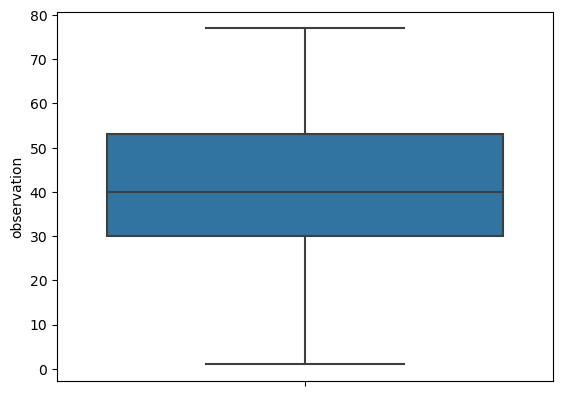

In [173]:
# your code here
sns.boxplot(y=ages3['observation'])

In [ ]:
"""
Está bastante normalizado. Muy comprimido por el centro
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""